In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

### 데이터셋 준비

In [2]:
# ETF 데이터 다운로드
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data = data.droplevel(0, axis=1).resample('W').last()

[*********************100%***********************]  9 of 9 completed


In [6]:
# 수익률 계싼
rets = data.pct_change().fillna(0)
rets

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-17,-0.032073,-0.017247,-0.018397,-0.006154,-0.016493,0.007527,0.006185,0.013845,-0.013491
2010-01-24,-0.064201,-0.049950,-0.050870,-0.042312,-0.044131,-0.017931,-0.035264,-0.017380,-0.032021
2010-01-31,-0.047107,-0.031971,0.000000,-0.016523,-0.032318,-0.003423,-0.009725,-0.012002,-0.003791
2010-02-07,0.011281,-0.004771,-0.016925,-0.006574,0.005249,-0.008397,-0.020657,-0.014386,-0.004843
...,...,...,...,...,...,...,...,...,...
2023-02-12,-0.016545,0.049442,-0.002733,-0.006903,-0.009805,-0.005858,-0.002945,-0.001507,-0.021143
2023-02-19,-0.008899,-0.063408,-0.002741,0.008714,-0.003989,0.009730,0.011372,-0.003774,0.016335
2023-02-26,-0.001353,0.002012,-0.020060,-0.026400,-0.026677,-0.013165,-0.027307,-0.026366,-0.044564


### 동일 비중 포트폴리오

In [4]:
# EW 포트폴리오 수익률
port_rets = rets.mean(axis=1)

port_rets

Date
2010-01-10    0.000000
2010-01-17   -0.008478
2010-01-24   -0.039340
2010-01-31   -0.017429
2010-02-07   -0.006669
                ...   
2023-02-12   -0.002000
2023-02-19   -0.004073
2023-02-26   -0.020431
2023-03-05    0.017738
2023-03-12    0.002067
Freq: W-SUN, Length: 688, dtype: float64

<Axes: xlabel='Date'>

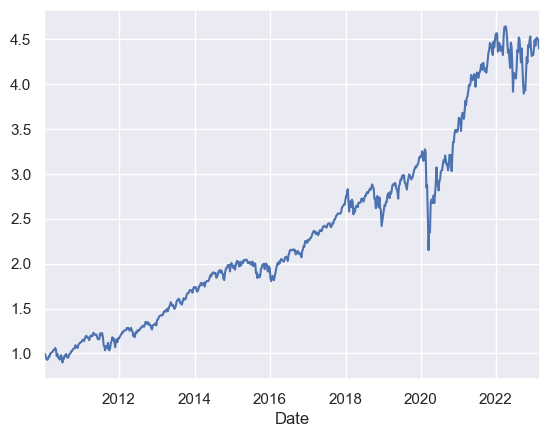

In [5]:
# 백테스팅 결과
(1 + port_rets).cumprod().plot()

### 고정 비중 구현

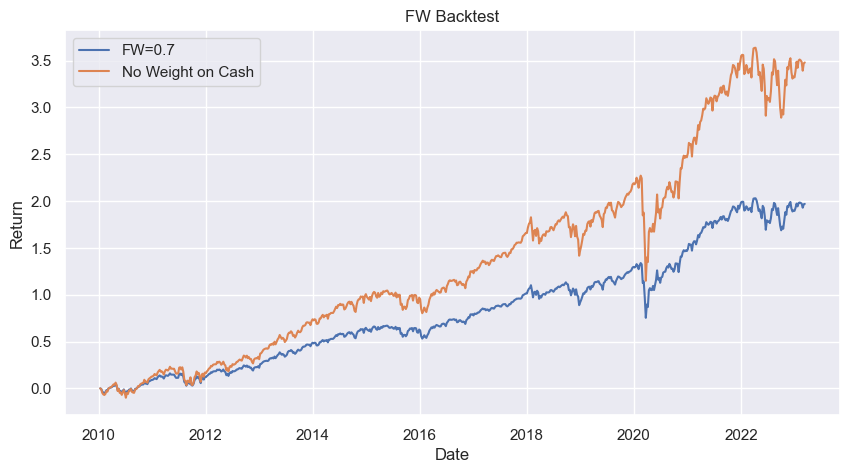

In [7]:
# 고정 비중 70% = 현금 비중 30%
fw_weights = 0.7

# 포트폴리오 수익률
fw_rets = fw_weights * port_rets

# 포트폴리오 누적수익률
fw_cum_rets = (1 + fw_rets).cumprod() - 1

# 기존 포트폴리오 누적수익률
port_cum_rets = (1 + port_rets).cumprod() - 1

# 백테스팅 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(fw_cum_rets, label=f'FW={fw_weights}')
plt.plot(port_cum_rets, label='No Weight on Cash')
plt.title('FW Backtest')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()